# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

# Developing Linear Regression Model

In [2]:
class GD_LinearRegression:
    def __init__(self, eta=0.0001, max_iterations=1000):
        self.eta = eta
        self.max_iterations = max_iterations
        self.theta_ = np.zeros((1,))
        self.loss = []
        
    def fit(self, X, y):
        X = np.array(X)
        X_b = np.c_[(np.ones((X.shape[0], 1)), X)]
        m, n = X_b.shape
        y = np.array(y)
        self.theta_ = np.zeros(shape=n)
        for i in range(self.max_iterations):
            gradients = X_b.T.dot(X_b.dot(self.theta_)-y) / m
            self.theta_ = self.theta_ - self.eta * gradients
            self.loss.append(X_b.T.dot(X_b.dot(self.theta_)-y)**2)
        return self
    
    def predict(self, X):
        X = np.array(X)
        X_b = np.c_[(np.ones((X.shape[0], 1)), X)]
        return X_b.dot(self.theta_)
    
    def get_RSS(self, X, y):
        X = np.array(X)
        y = np.ravel(np.array(y))
        predictions = self.predict(X)
        residuals = predictions - y
        RSS = np.square(residuals).sum()
        return(RSS)
    
    def R2(self, X, y):
        X = np.array(X)
        X_b = np.c_[(np.ones((X.shape[0], 1)), X)]
        m, n = X_b.shape
        y = np.array(y)
        
        y_bar = np.mean(y)
        sstor = np.sum((X_b.dot(self.theta_) - y_bar)**2)
        rss = self.get_RSS(X, y)
        R2 = 1-rss/sstor
        return R2
    
    def get_params(self, deep=True):
        weights = {}
        for i in range(self.theta_.shape[0]):
            name = 'theta_'+str(i)
            weights[name] = self.theta_[i]
        return weights

# Problem One (Univariate Model)

In [3]:
data = pd.read_csv("RegData.csv", header=None)

In [4]:
data.head()

,0,1
0,2.9,4.0
1,6.7,7.4
2,4.9,5.0
3,7.9,7.2
4,9.8,7.9


In [5]:
X = data.iloc[:, 0]
y = data.iloc[:, 1]

R2 =  0.8050907685132593


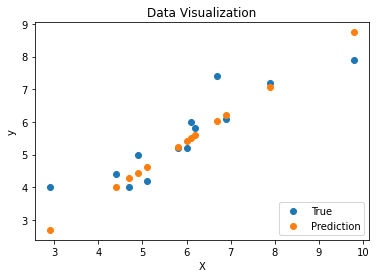

In [6]:
model = GD_LinearRegression()
model.fit(X, y)
plt.scatter(X, y)
plt.scatter(X, model.predict(X))
fig1 = plt.figure(1)
plt.title("Data Visualization")
plt.xlabel("X")
plt.ylabel("y")
plt.legend(["True", "Prediction"], loc ="lower right")
print("R2 = ", model.R2(X,y))

R2 =  {'theta_0': 0.14632558592497913, 'theta_1': 0.8775218359713112}


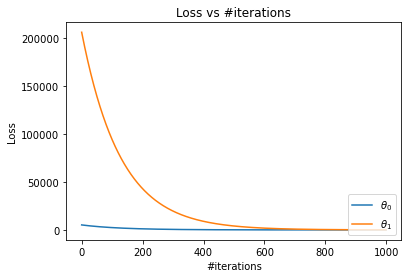

In [7]:
fig2 = plt.figure(2)
plt.plot(model.loss)
plt.title("Loss vs #iterations")
plt.xlabel("#iterations")
plt.ylabel("Loss")
plt.legend([r'$\theta_{0}$', r'$\theta_{1}$'], loc ="lower right")
print("R2 = ", model.get_params())

# Problem Two (Multi Variate Model)

In [8]:
data2 = pd.read_csv("MultipleLR.csv", header=None)
data2.head()

,0,1,2,3
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142


In [9]:
X2 = data2.iloc[:, 0:-1]
y2 = data2.iloc[:, -1]

{'theta_0': 0.002899507139212802, 'theta_1': 0.442036972843763, 'theta_2': 0.5177782476642598, 'theta_3': 1.0556980651027519}


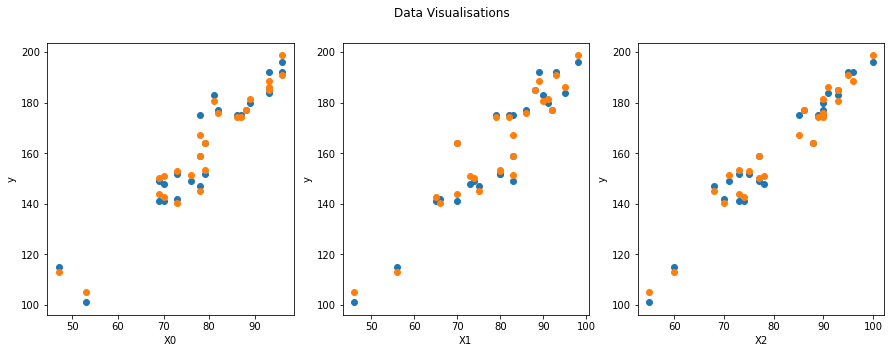

In [10]:
model2 = GD_LinearRegression()
model2.fit(X2, y2)
fig, a =  plt.subplots(1,3,figsize=(15,5))
fig.suptitle('Data Visualisations')
a[0].scatter(X2[0], y2)
a[0].scatter(X2[0], model2.predict(X2))
a[0].set(xlabel='X0', ylabel='y')
a[1].scatter(X2[1], y2)
a[1].scatter(X2[1], model2.predict(X2))
a[1].set(xlabel='X1', ylabel='y')
a[2].scatter(X2[2], y2)
a[2].scatter(X2[2], model2.predict(X2))
a[2].set(xlabel='X2', ylabel='y')

print(model2.get_params())

R2 =  0.8050907685132593


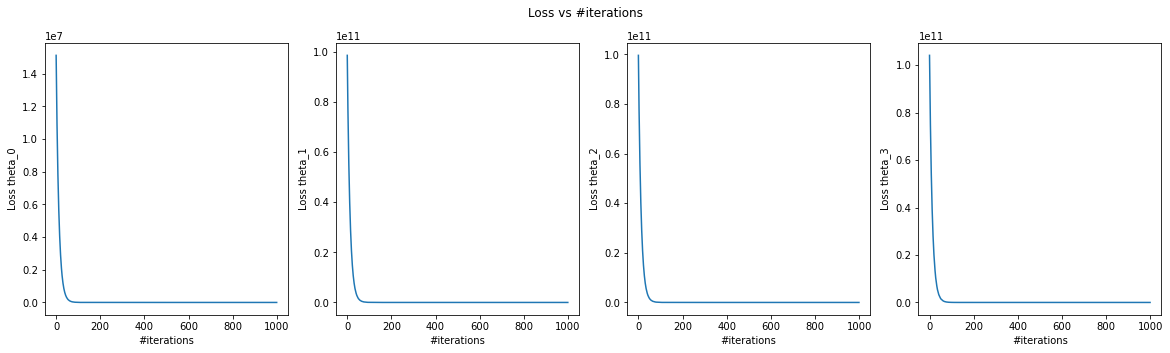

In [11]:
fig2, a2 =  plt.subplots(1,4,figsize=(20,5))
fig2.suptitle('Loss vs #iterations')
a2[0].plot(np.array(model2.loss).T[0])
a2[0].set(xlabel='#iterations', ylabel='Loss theta_0')
a2[1].plot(np.array(model2.loss).T[1])
a2[1].set(xlabel='#iterations', ylabel='Loss theta_1')
a2[2].plot(np.array(model2.loss).T[2])
a2[2].set(xlabel='#iterations', ylabel='Loss theta_2')
a2[3].plot(np.array(model2.loss).T[3])
a2[3].set(xlabel='#iterations', ylabel='Loss theta_3')
print("R2 = ", model.R2(X,y))

# Solving using sklearn

In [12]:
import sklearn
from sklearn.linear_model import LinearRegression

model3 = LinearRegression()
X3 = np.array(X2)
model3.fit(X3, y2)

print(sklearn.metrics.r2_score(X, y))

0.7472536683793205
